# Bird Species Observation Analysis
##### Submitted by Aswathy Gopalakrishnan

### Problem Statement:
The project aims to analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands. By examining bird species observations across these habitats, the goal is to understand how environmental factors, such as vegetation type, climate, and terrain, influence bird populations and their behavior. The study will involve working on the provided observational data of bird species present in both ecosystems, identifying patterns of habitat preference, and assessing the impact of these habitats on bird diversity. The findings can provide valuable insights into habitat conservation, biodiversity management, and the effects of environmental changes on avian communities.


### Import Libraries

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Datasets

There are two datasets - 'Bird_Monitoring_Data_FOREST.XLSX' and 'Bird_Monitoring_Data_GRASSLAND.XLSX'

In [475]:
df_forest = pd.read_excel("Bird_Monitoring_Data_FOREST.XLSX", sheet_name=None)
df_grassland = pd.read_excel("Bird_Monitoring_Data_GRASSLAND.XLSX", sheet_name=None)

### Combining the Datasets

As the data is present in different sheets in the Excel, it is flattened before combining them to one single dataframe 

In [476]:
def combine_sheets(sheet_dict):
    df_list = []
    for name, df in sheet_dict.items():
        df['Admin_Unit_Code'] = name          
        df = df[df['Admin_Unit_Code'].notnull() & (df['Admin_Unit_Code'] != '')]
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

combined_forest_data = combine_sheets(df_forest)
combined_grassland_data = combine_sheets(df_grassland)

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\4265156912.py:7: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Combining the forest and grassland data to one dataframe

In [477]:
df = pd.concat([combined_forest_data, combined_grassland_data], ignore_index=True)
df.to_csv("combined_bird_dataset.csv", index=False)

### Dataset First View

In [478]:
df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN


### Dataset Info

In [479]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    17077 non-null  object        
 4   Location_Type                17077 non-null  object        
 5   Year                         17077 non-null  object        
 6   Date                         17077 non-null  datetime64[ns]
 7   Start_Time                   17077 non-null  object        
 8   End_Time                     17077 non-null  object        
 9   Observer                     17077 non-null  object        
 10  Visit                        17077 non-null  object        
 11  Interval_Length              17077 non-nu

### Duplicate Values

In [480]:
duplicates = df.duplicated().sum()
print('Number of duplicates : ', duplicates)

Number of duplicates :  1705


In [481]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

      Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
8553             ANTI           NaN       NaN  ANTI-0054     Grassland  2018   
8572             ANTI           NaN       NaN  ANTI-0028     Grassland  2018   
8586             ANTI           NaN       NaN  ANTI-0027     Grassland  2018   
8594             ANTI           NaN       NaN  ANTI-0027     Grassland  2018   
8598             ANTI           NaN       NaN  ANTI-0027     Grassland  2018   
...               ...           ...       ...        ...           ...   ...   
17072            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17073            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17074            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17075            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17076            MONO           NaN       NaN  MONO-0089     Grassland  2018   

            Date Start_Time  End_Time  

In [482]:
df = df.drop_duplicates()

In [483]:
df.duplicated().sum()

0

### Missing Values

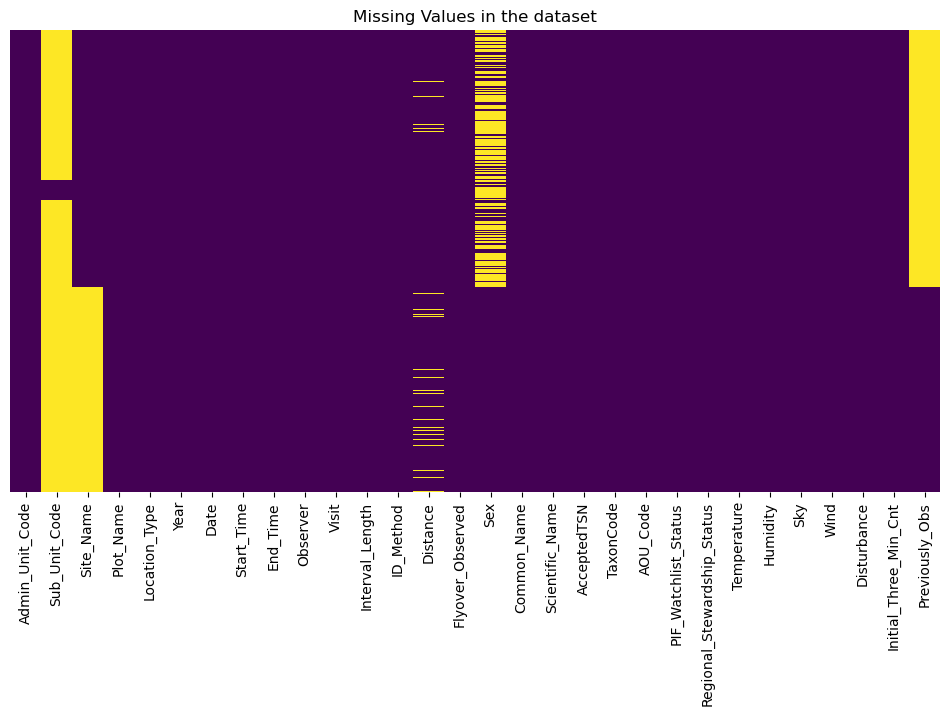

In [484]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in the dataset')
plt.show()

In [485]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Admin_Unit_Code                    0
Sub_Unit_Code                  14650
Site_Name                       6826
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          2
Distance                         689
Flyover_Observed                   0
Sex                             5183
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       28
TaxonCode                          2
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind     

The columns that are iorrelevant and has high volume of missing values are removed

In [486]:
df.drop(columns=['Sub_Unit_Code', 'TaxonCode', 'Previously_Obs','AcceptedTSN','Site_Name'], inplace=True)

In [487]:
df['Sex'] = df['Sex'].fillna('Undetermined')
df['ID_Method'] = df['ID_Method'].fillna('Unknown')
df['Distance'] = df['Distance'].fillna('Unknown')

In [488]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
dtype: int64


In [ ]:
# Saving the cleaned datset
df.to_csv("cleaned_bird_dataset.csv", index=False)

# EDA

### Unique Values

Identify the unique values for each feature to get a better understanding of the data

In [490]:
df.nunique().sort_values()

Year                             1
Flyover_Observed                 2
Regional_Stewardship_Status      2
PIF_Watchlist_Status             2
Initial_Three_Min_Cnt            2
Location_Type                    2
Observer                         3
Visit                            3
Distance                         3
Sex                              3
Wind                             4
Interval_Length                  4
ID_Method                        4
Disturbance                      4
Sky                              5
Admin_Unit_Code                 11
Date                            64
Common_Name                    126
AOU_Code                       126
Scientific_Name                127
Temperature                    210
End_Time                       318
Start_Time                     318
Humidity                       432
Plot_Name                      609
dtype: int64

In [491]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nUnique values in '{col}':\n{unique_vals}\n")


Unique values in 'Admin_Unit_Code':
['ANTI' 'CATO' 'CHOH' 'GWMP' 'HAFE' 'MANA' 'MONO' 'NACE' 'PRWI' 'ROCR'
 'WOTR']


Unique values in 'Plot_Name':
['ANTI-0036' 'ANTI-0082' 'ANTI-0078' 'ANTI-0025' 'ANTI-0052' 'ANTI-0072'
 'ANTI-0092' 'ANTI-0190' 'ANTI-0194' 'ANTI-0200' 'ANTI-0206' 'ANTI-0207'
 'ANTI-0201' 'CATO-0003' 'CATO-0016' 'CATO-0035' 'CATO-0037' 'CATO-0049'
 'CATO-0237' 'CATO-0294' 'CATO-0160' 'CATO-0271' 'CATO-0176' 'CATO-0101'
 'CATO-0092' 'CATO-0062' 'CATO-0098' 'CATO-0094' 'CATO-0365' 'CATO-0347'
 'CATO-0346' 'CATO-0359' 'CATO-0342' 'CATO-0004' 'CATO-0303' 'CATO-0323'
 'CATO-0150' 'CATO-0206' 'CATO-0238' 'CATO-0022' 'CATO-0086' 'CATO-0084'
 'CATO-0104' 'CATO-0153' 'CATO-0302' 'CATO-0333' 'CATO-0316' 'CATO-0275'
 'CATO-0280' 'CATO-0242' 'CATO-0258' 'CATO-0268' 'CATO-0211' 'CATO-0330'
 'CATO-0311' 'CATO-0313' 'CATO-0331' 'CATO-0158' 'CHOH-0677' 'CHOH-0539'
 'CHOH-0487' 'CHOH-0609' 'CHOH-0586' 'CHOH-0074' 'CHOH-0081' 'CHOH-0106'
 'CHOH-0102' 'CHOH-0076' 'CHOH-0286' 'CHOH-0267'

## 1. Spatial and Species Diversity Analysis

- Analysis to understand how bird species and counts vary across different habitats (Location_Type) like Forest vs Grassland.
- Examining site-level variation in species richness and abundance.
- Identifying the most common and widespread bird species across habitats.
- Visualizing species composition within and across habitats.

### Statistical Analysis

**Unique Species in each Habitat**

In [492]:
species_by_habitat = df.groupby('Location_Type')['Scientific_Name'].nunique()
print(species_by_habitat)

Location_Type
Forest       108
Grassland    107
Name: Scientific_Name, dtype: int64


**Top 10 Bird Species by Common Name**

In [493]:
df['Common_Name'].value_counts().head(10)

Common_Name
Northern Cardinal          1125
Carolina Wren               993
Red-eyed Vireo              738
Eastern Tufted Titmouse     720
Indigo Bunting              611
Eastern Wood-Pewee          574
Field Sparrow               492
Red-bellied Woodpecker      489
American Robin              470
Acadian Flycatcher          462
Name: count, dtype: int64

**Richness of Species in each Admin Units**

In [494]:
richness_by_Admin_Unit = df.groupby('Admin_Unit_Code')['Scientific_Name'].nunique().sort_values(ascending=False).head(10)
print("Richness by Admin Uni:\n", richness_by_Admin_Unit)

Richness by Admin Uni:
 Admin_Unit_Code
MONO    100
ANTI     81
MANA     81
CHOH     80
NACE     66
HAFE     55
PRWI     54
GWMP     49
CATO     46
ROCR     45
Name: Scientific_Name, dtype: int64


### Visualization

Graphs are plotted for a better visualization of the results and to derive insights

**Species Richness per Habitat**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\4010696102.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




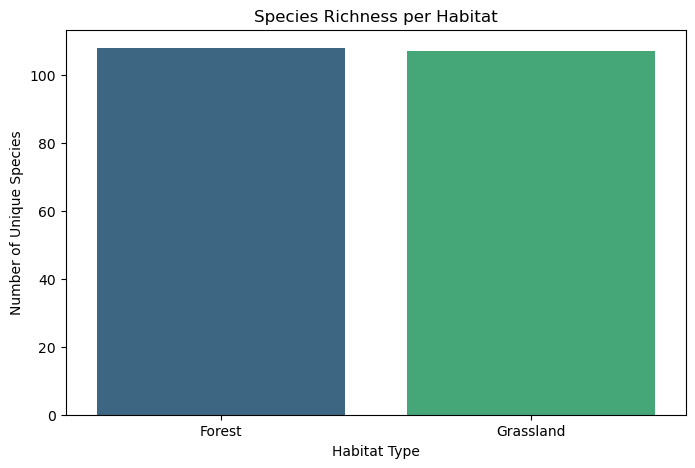

In [ ]:
species_richness = df.groupby('Location_Type')['Common_Name'].nunique().reset_index()
species_richness.columns = ['Habitat', 'Species_Richness']

# Bar plot for species richness
plt.figure(figsize=(8,5))
sns.barplot(x='Habitat', y='Species_Richness', data=species_richness, palette='viridis')
plt.title('Species Richness per Habitat')
plt.ylabel('Number of Unique Species')
plt.xlabel('Habitat Type')
plt.show()

**Top Observed Species Overall**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\966892498.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




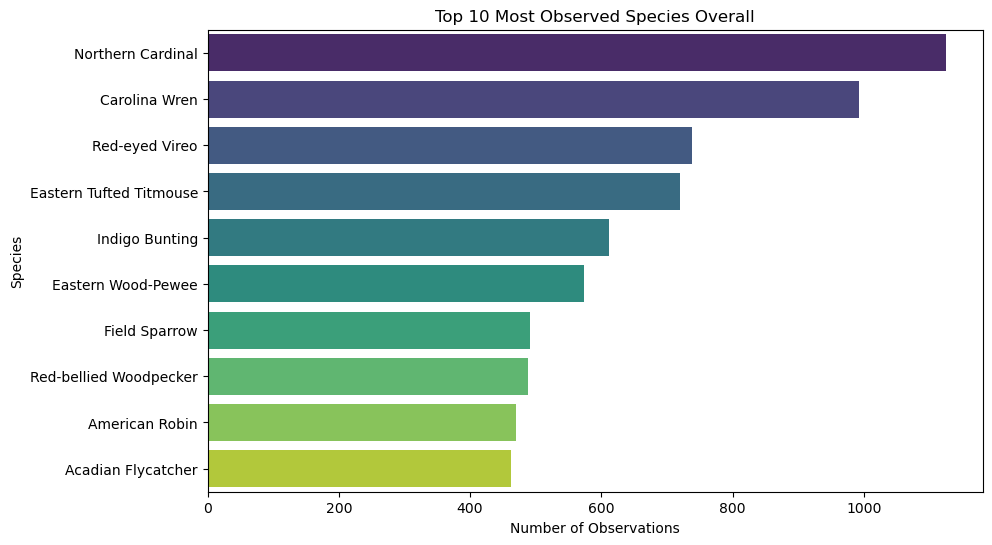

In [497]:
# Count total observations per species
top_species = df['Common_Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_species.values, y=top_species.index, palette='viridis')
plt.title('Top 10 Most Observed Species Overall')
plt.xlabel('Number of Observations')
plt.ylabel('Species')
plt.show()

**Top Species across Habitats**

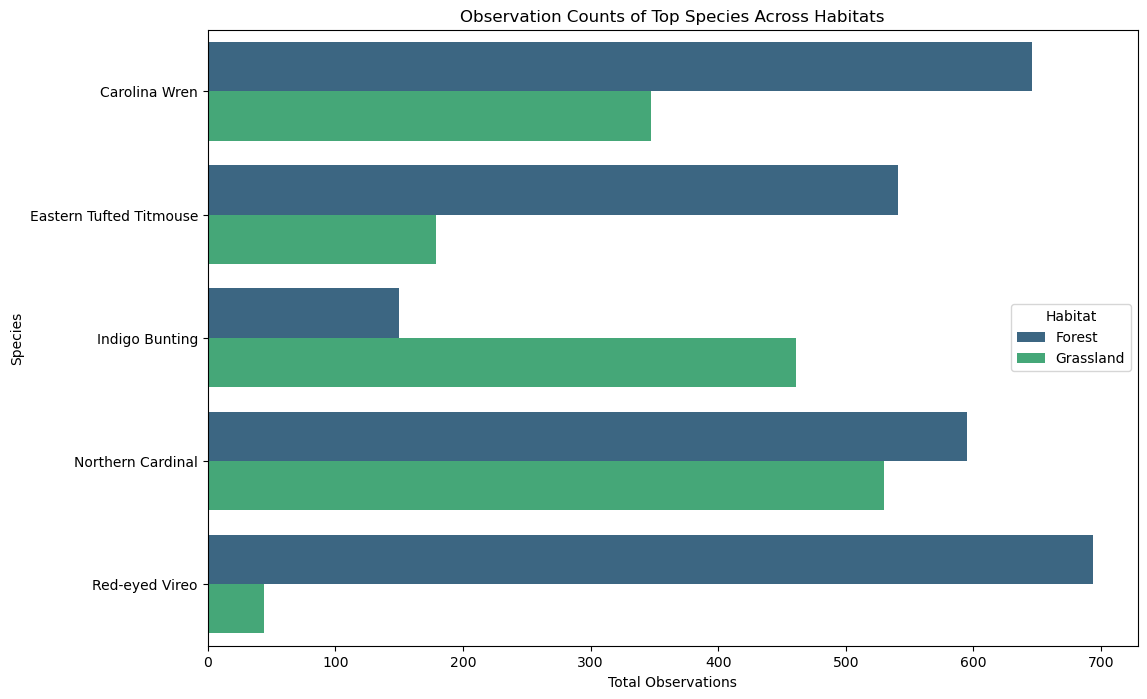

In [498]:
# Count of top species per habitat
species_habitat_counts = df.groupby(['Location_Type', 'Common_Name']).size().reset_index(name='Observation_Count')

# Top 5 species overall
top_species_list = df['Common_Name'].value_counts().index[:5]

plt.figure(figsize=(12,8))
sns.barplot(
    data=species_habitat_counts[species_habitat_counts['Common_Name'].isin(top_species_list)],
    x='Observation_Count',
    y='Common_Name',
    hue='Location_Type',
    palette='viridis',
)
plt.title('Observation Counts of Top Species Across Habitats')
plt.xlabel('Total Observations')
plt.ylabel('Species')
plt.legend(title='Habitat')
plt.show()

**Top Admin Units**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\2664773526.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




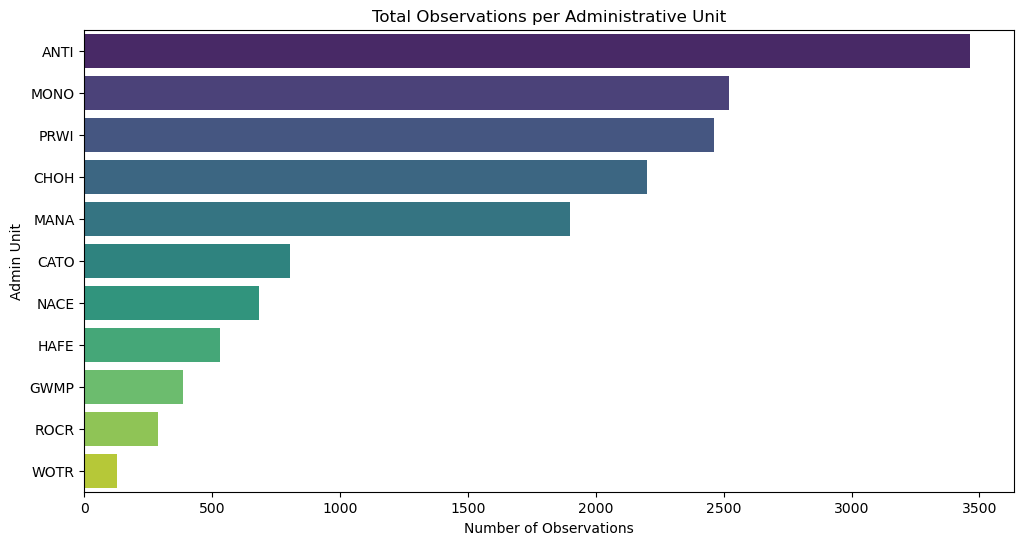

In [499]:
# Count total observations per admin unit
admin_counts = df['Admin_Unit_Code'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=admin_counts.values, y=admin_counts.index, palette= 'viridis')
plt.title('Total Observations per Administrative Unit')
plt.xlabel('Number of Observations')
plt.ylabel('Admin Unit')
plt.show()

**Top Admin Units Based on Habitat**

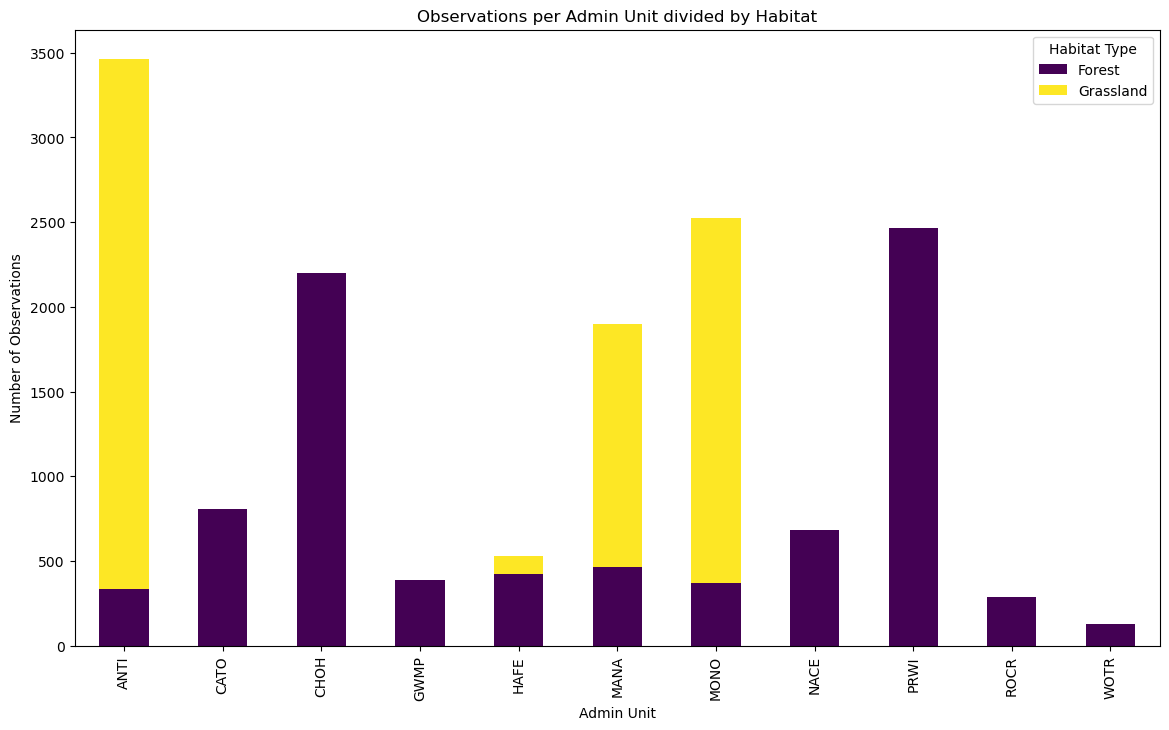

In [500]:
# Count total observations per admin unit and habitat
admin_habitat_counts = df.groupby(['Admin_Unit_Code', 'Location_Type']).size().reset_index(name='Observation_Count')

# For better visualization, you might pivot the data
pivot_table = admin_habitat_counts.pivot(index='Admin_Unit_Code', columns='Location_Type', values='Observation_Count').fillna(0)

# Plotting if needed: e.g., bar plot for each admin unit stacked by habitat
pivot_table.plot(kind='bar', stacked=True, figsize=(14,8),colormap='viridis')
plt.title('Observations per Admin Unit divided by Habitat')
plt.ylabel('Number of Observations')
plt.xlabel('Admin Unit')
plt.legend(title='Habitat Type')
plt.show()


**Sex Distribution of Species**

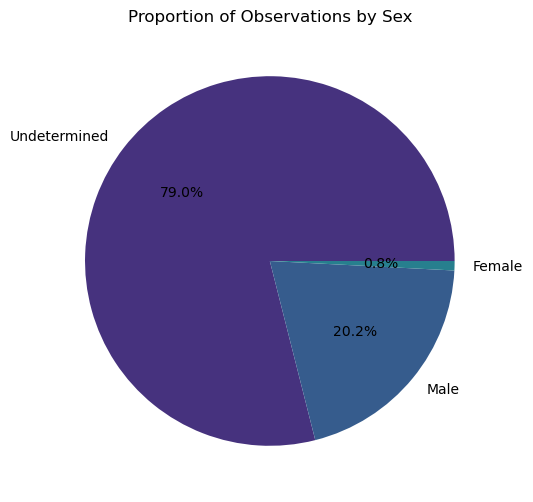

In [527]:
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of Observations by Sex')
plt.show()

<div style="background-color: purple; padding: 5px;">  

**Insights from Spatial and Species Analysis:**

- *There are 126 unique species of birds observed in the dataset. There are 108 unique species observed in forest, and 107 in grassland.*  
- *Northern Cardinal, Carolina Wren, and Red-eyed Vireo are the top 3 most common species observed.*
- *MONO(100), ANTI(81), MANA(81) and CHOH(80) are the top admin units based on species diversity*
- *Along with the previously mentioned admin units, PRWI(54) stands out for high number of observations*
- *Sex was undetermined for 79% of the observations. Among the ones determined, male species dominate by 20.2%*
</div>

## 2. Environmental Influences on Bird Presence

- Explore how environmental variables like Temperature, Humidity, Sky condition, and Wind affect bird observations and species diversity
- Analyse how these affect the flyover patterns, identification method, and response to disturbances
- Identify potential relationships or patterns through visualization

**Scatter Plot to Identify the best temparature and Humidity conditions to Observe Birds**

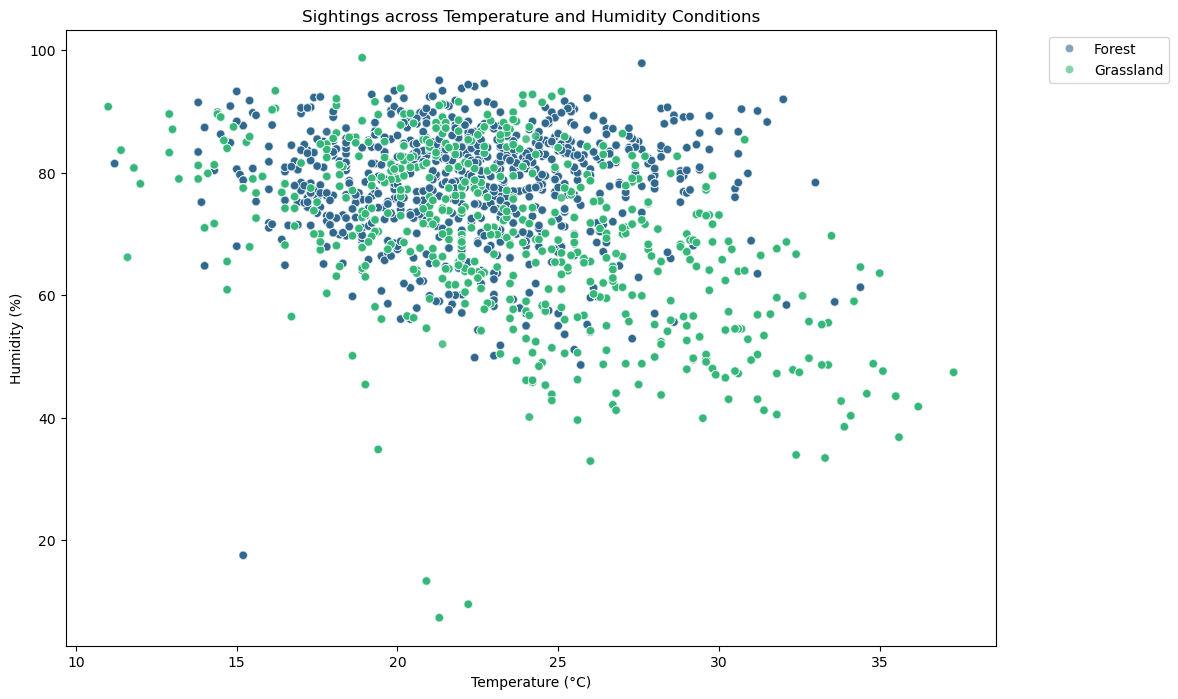

In [ ]:
# Scatter plot: Temperature vs. Humidity with species as hue
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Temperature', 
    y='Humidity', 
    hue='Location_Type', 
    data=df,
    alpha=0.6,
    palette='viridis'
)
plt.title('Sightings across Temperature and Humidity Conditions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

**Bar Chart to Identify Temparature Bins with Maximum Observation Count**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\2777247935.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




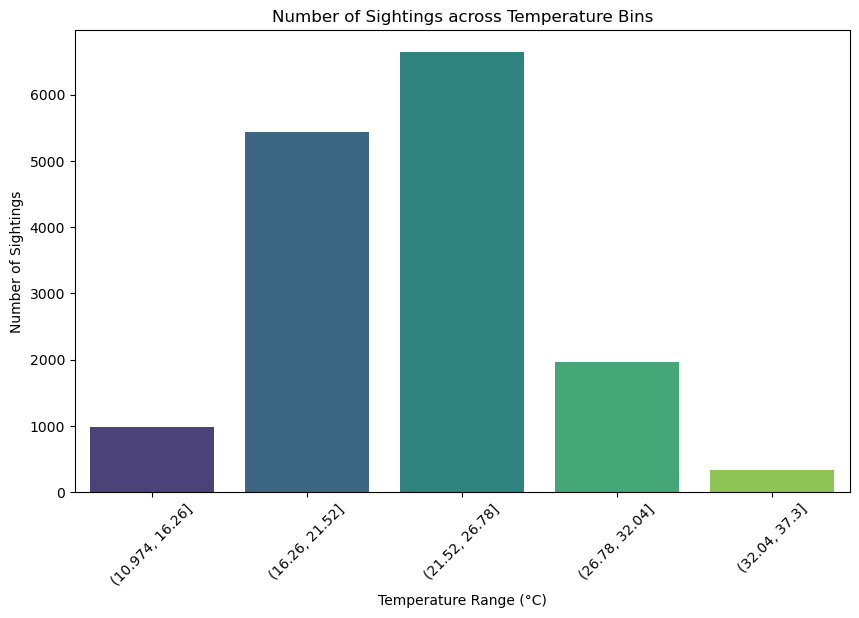

In [506]:
# Create temperature bins
df['Temp_Bin'] = pd.cut(df['Temperature'], bins=5)

# Plot number of sightings per temperature bin
plt.figure(figsize=(10,6))
sns.countplot(x='Temp_Bin', data=df, palette='viridis')
plt.title('Number of Sightings across Temperature Bins')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

**Bar Plot to Identify Humidity Bins with Maximum Observation Count**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\726514183.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




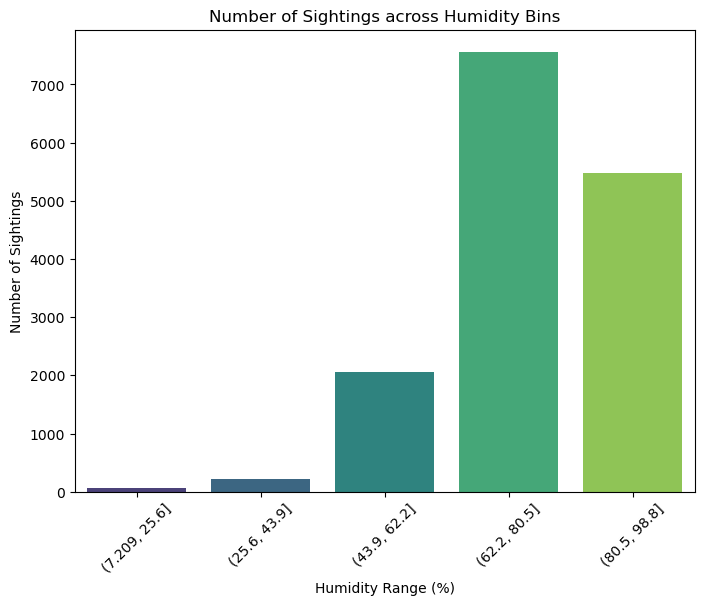

In [507]:
# Create humidity bins
df['Humidity_Bin'] = pd.cut(df['Humidity'], bins=5)

# Plot number of sightings per humidity bin
plt.figure(figsize=(8,6))
sns.countplot(x='Humidity_Bin', data=df, palette='viridis')
plt.title('Number of Sightings across Humidity Bins')
plt.xlabel('Humidity Range (%)')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()


**Effect of Windspeed on Observation Count**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\4176120320.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




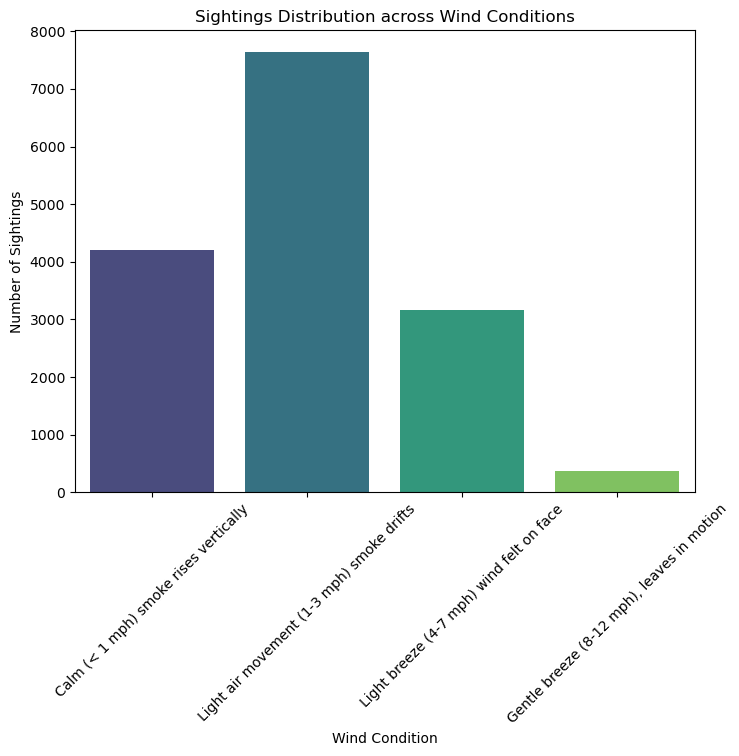

In [508]:
plt.figure(figsize=(8,6))
sns.countplot(x='Wind', data=df, palette='viridis')
plt.title('Sightings Distribution across Wind Conditions')
plt.xlabel('Wind Condition')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()


**Counts of Flyover vs. Non-Flyover Observations**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\994641809.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




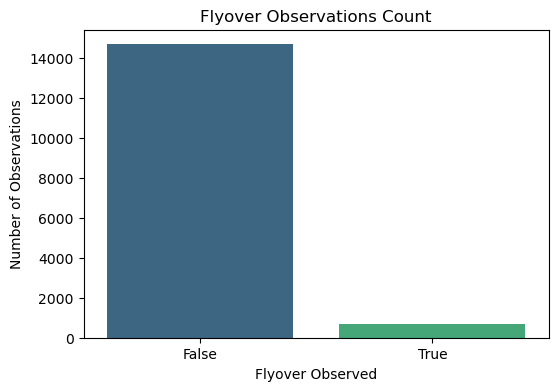

In [509]:
plt.figure(figsize=(6,4))
sns.countplot(x='Flyover_Observed', data=df, palette='viridis')
plt.title('Flyover Observations Count')
plt.xlabel('Flyover Observed')
plt.ylabel('Number of Observations')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

**Relationship between Wind Conditions and Flyover Observations**

In [510]:
df.groupby('Flyover_Observed')['Wind'].value_counts()

Flyover_Observed  Wind                                      
False             Light air movement (1-3 mph) smoke drifts     7299
                  Calm (< 1 mph) smoke rises vertically         4090
                  Light breeze (4-7 mph) wind felt on face      2961
                  Gentle breeze (8-12 mph), leaves in motion     333
True              Light air movement (1-3 mph) smoke drifts      337
                  Light breeze (4-7 mph) wind felt on face       200
                  Calm (< 1 mph) smoke rises vertically          120
                  Gentle breeze (8-12 mph), leaves in motion      32
Name: count, dtype: int64

**Relationship between Humidity and Flyover Observation**

In [511]:
df.groupby('Flyover_Observed')['Humidity'].mean()

Flyover_Observed
False    74.361248
True     69.856459
Name: Humidity, dtype: float64

**Count of Sightings by Sky Condition**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\2744262679.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




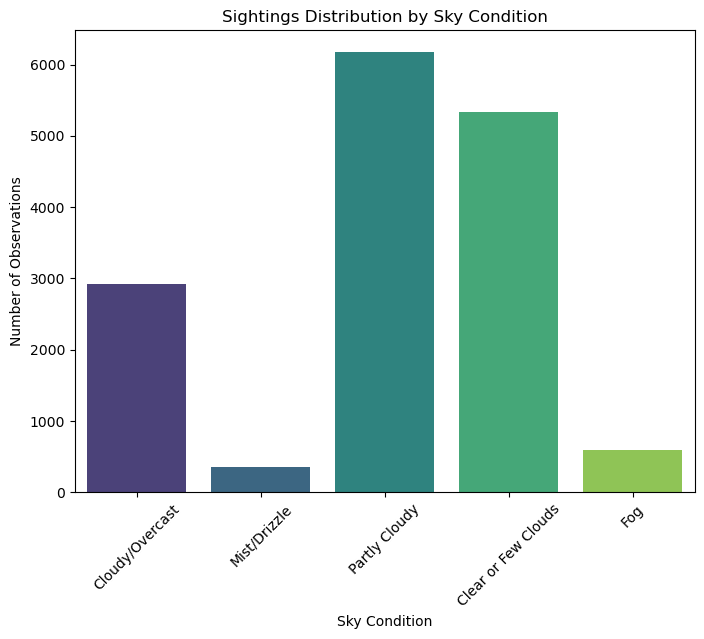

In [512]:
# Count observations per sky condition
plt.figure(figsize=(8,6))
sns.countplot(x='Sky', data=df, palette='viridis')
plt.title('Sightings Distribution by Sky Condition')
plt.xlabel('Sky Condition')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()


**Distribution of Identification Methods**

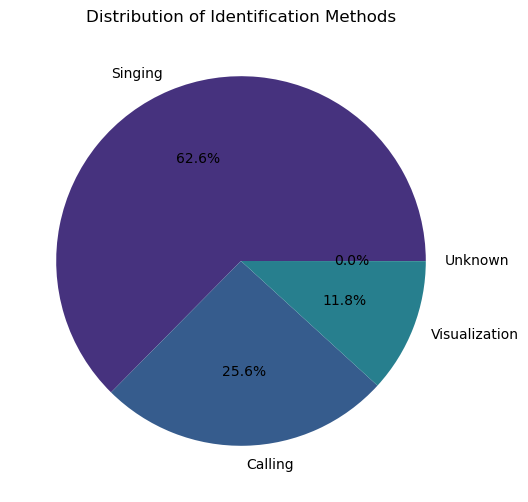

In [528]:
Identification_counts = df['ID_Method'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Identification_counts, labels=Identification_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Identification Methods')
plt.show()


**Detection of Species**

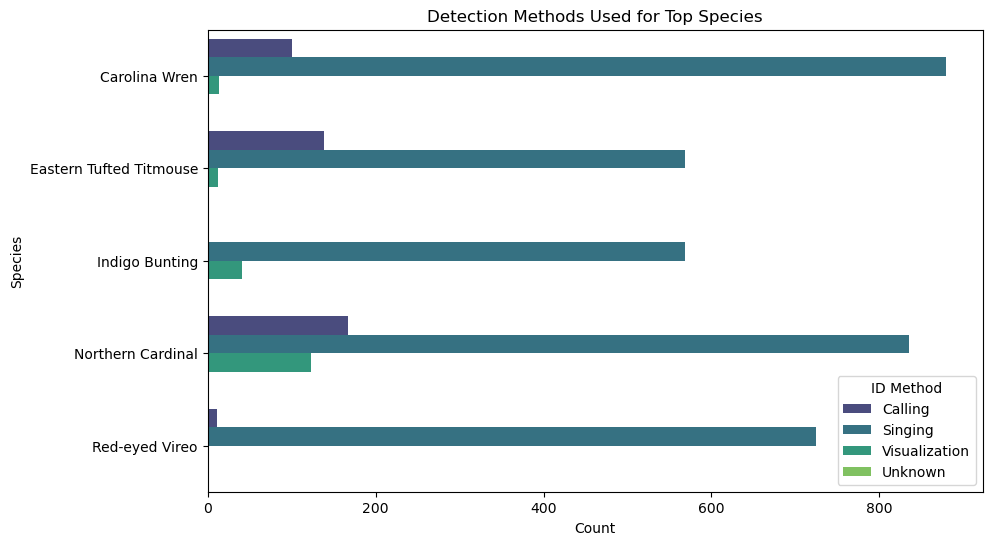

In [ ]:
top_species = df['Common_Name'].value_counts().index[:5]

# Count of detection methods for top species
species_method_counts = df[df['Common_Name'].isin(top_species)].groupby(['Common_Name', 'ID_Method']).size().reset_index(name='Counts')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='Counts',
    y='Common_Name',
    hue='ID_Method',
    data=species_method_counts,
    palette='viridis'
)
plt.title('Detection Methods Used for Top Species')
plt.xlabel('Count')
plt.ylabel('Species')
plt.legend(title='ID Method')
plt.show()


**Effect of Disturbance on Observation Count**

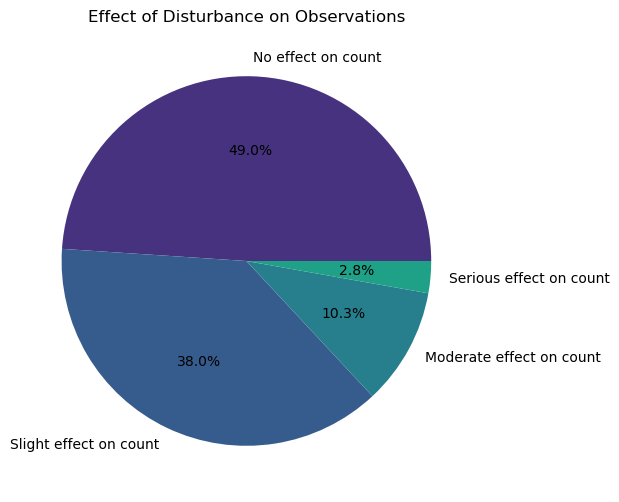

In [529]:
Disturbance_counts = df['Disturbance'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Disturbance_counts, labels=Disturbance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Effect of Disturbance on Observations')
plt.show()

<div style="background-color: purple; padding: 5px;">  

**Insights from Environmental Impact Analysis**
- *Majority of sighting happen when the temperature is between 20 to 25, and humidity 65 to 80*
- *The sighting are the least when the sky is foggy or misty*
- *When it comes to windspeed, more sightings are observed with light air movements. the pattern is similar for flyover observed*
- *Maximum observation period is between 5:55 and 8:30 in the morning*
- *Most common identification method is singing*
- *The disturbances did not have serious impact on the observation*
</div>

## 3.Threatened Species Analysis
- Analyze the distribution of threatened vs. non-threatened species across different habitat types (Location_Type).
- Identify the top threatened species by PIF-watchlist
- Visualize to derive insights

In [515]:
# Convert to lowercase for consistency
df['PIF_Watchlist_Status'] = df['PIF_Watchlist_Status'].astype(str).str.strip().str.lower()

# Now filter again
at_risk_data = df[df['PIF_Watchlist_Status'] == 'true']
non_risk_data = df[df['PIF_Watchlist_Status'] != 'true']

**Top Threatened Species by Common name**

In [516]:
threatened_species = df[df['PIF_Watchlist_Status'] == 'true']

# Group by 'Common_Name' and get counts or list of threatened species
threatened_by_common_name = threatened_species.groupby('Common_Name').size().reset_index(name='Count')

# To see all threatened species with their counts, sorted by highest count
threatened_by_common_name_sorted = threatened_by_common_name.sort_values(by='Count', ascending=False)

print(threatened_by_common_name_sorted)

             Common_Name  Count
6            Wood Thrush    309
7    Worm-eating Warbler     31
3        Prairie Warbler     25
1       Cerulean Warbler      7
2       Kentucky Warbler      2
5      Willow Flycatcher      2
0    Blue-winged Warbler      1
4  Red-headed Woodpecker      1


In [517]:
# Count the number of observations for threatened and non-threatened species per habitat
habitat_counts_threatened = at_risk_data['Location_Type'].value_counts()
habitat_counts_non_threatened = non_risk_data['Location_Type'].value_counts()
# Prepare data for comparison
habitat_df = pd.DataFrame({
    'Threatened': habitat_counts_threatened,
    'Non_Threatened': habitat_counts_non_threatened
}).reset_index().rename(columns={'index': 'Habitat_Type'})

print(habitat_df)

  Location_Type  Threatened  Non_Threatened
0        Forest         338            8208
1     Grassland          40            6786


**Observation Count of Threatened Species by Habitat**

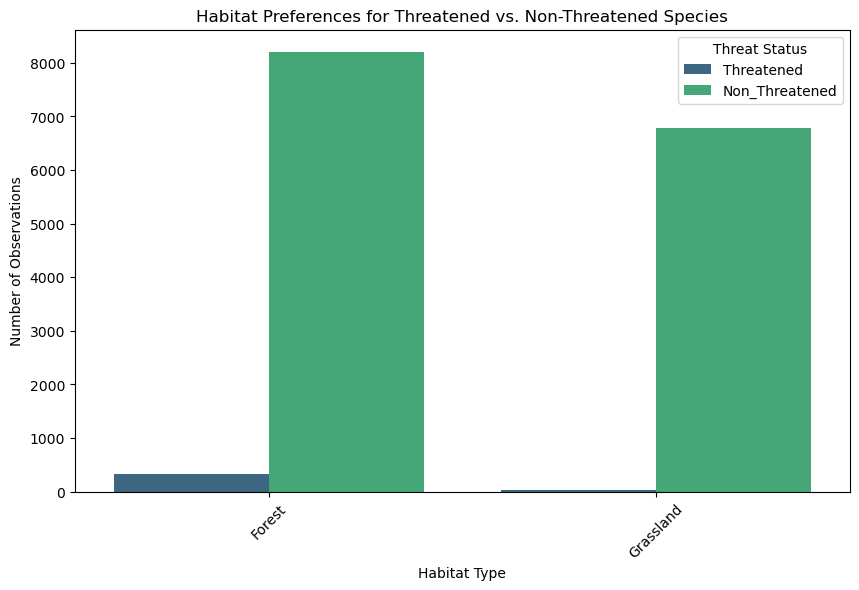

In [518]:
habitat_melted = habitat_df.melt(id_vars='Location_Type', value_vars=['Threatened', 'Non_Threatened'],
                                 var_name='Threat_Status', value_name='Observation_Count')

plt.figure(figsize=(10,6))
sns.barplot(x='Location_Type', y='Observation_Count', hue='Threat_Status', data=habitat_melted, palette='viridis')
plt.title('Habitat Preferences for Threatened vs. Non-Threatened Species')
plt.xlabel('Habitat Type')
plt.ylabel('Number of Observations')
plt.legend(title='Threat Status')
plt.xticks(rotation=45)
plt.show()

**Top Threatened Species**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\261929474.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




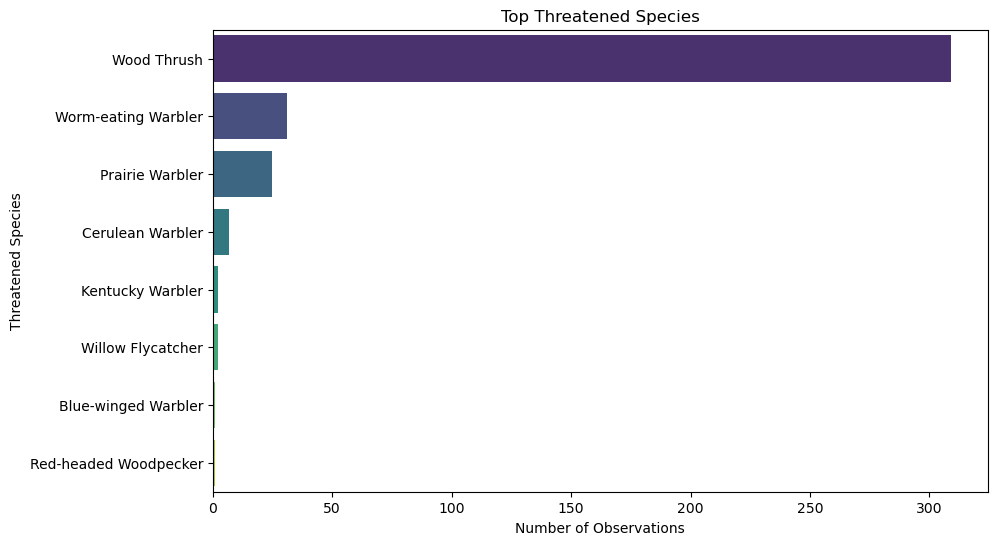

In [519]:
# Count top threatened species
top_threatened_species = at_risk_data['Common_Name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_threatened_species.values, y=top_threatened_species.index, palette='viridis')
plt.title('Top Threatened Species')
plt.xlabel('Number of Observations')
plt.ylabel('Threatened Species')
plt.show()

**Threatened Species Sightings per Habitat**

In [ ]:
# Count total threatened species sightings per habitat
threatened_counts_per_habitat = at_risk_data.groupby('Location_Type').size().reset_index(name='Threatened_Sightings')

# Count total sightings across habitats 
total_counts_per_habitat = df.groupby('Location_Type').size().reset_index(name='Total_Sightings')

# Combining for comparison 
comparison_df = pd.merge(threatened_counts_per_habitat, total_counts_per_habitat, on='Location_Type', how='left')

print(comparison_df)



  Location_Type  Threatened_Sightings  Total_Sightings
0        Forest                   338             8546
1     Grassland                    40             6826


Bar chart to visualize:

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\1905739104.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




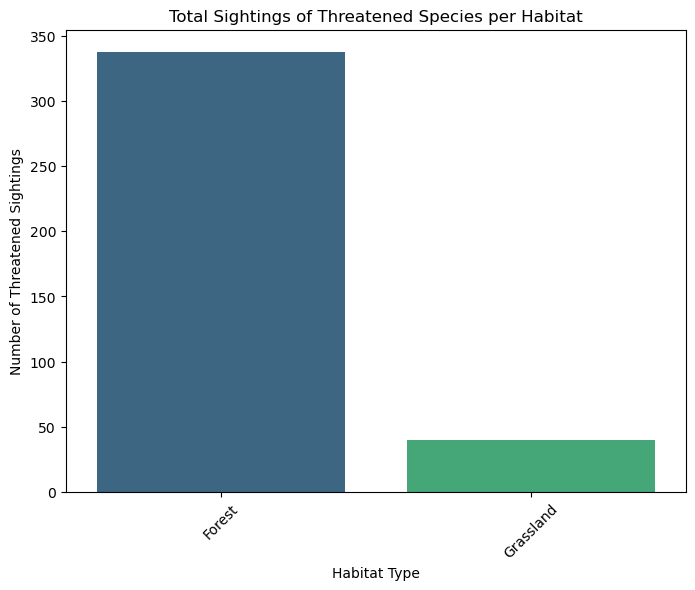

In [521]:
plt.figure(figsize=(8,6))
sns.barplot(x='Location_Type', y='Threatened_Sightings', data=comparison_df, palette='viridis')
plt.title('Total Sightings of Threatened Species per Habitat')
plt.xlabel('Habitat Type')
plt.ylabel('Number of Threatened Sightings')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 5px;">  

**Insights from Threatened Species Analysis**
- *There are 8 different threatened species*
- *Wood Thrust is the most observed threatened species*
- *Most of the threatened species are observed in forest*
</div>

## 4.Temporal Patterns Analysis

- Monthly and hourly patterns are identified

**Sightings by Month**

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\486060687.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




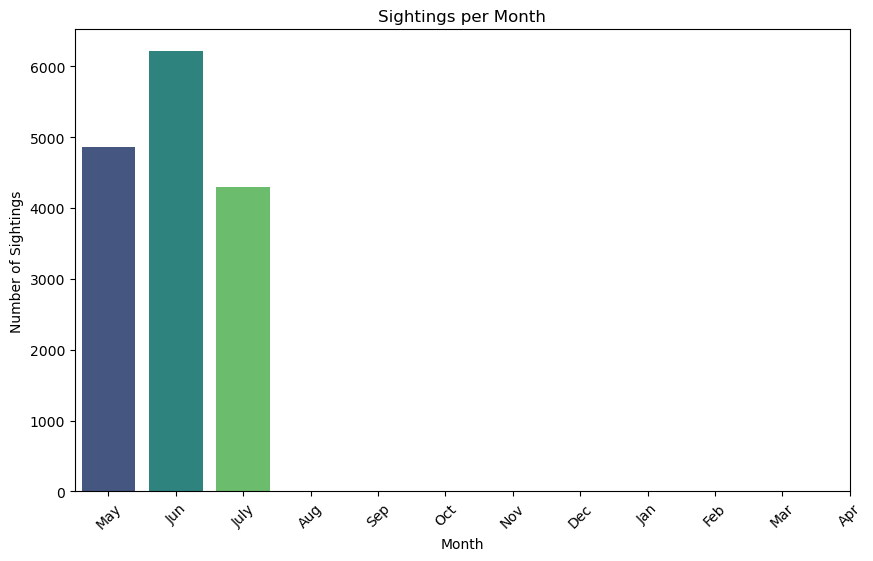

In [533]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

# Count sightings per month
monthly_counts = df['Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Sightings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(ticks=range(0,12), labels=['May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan','Feb','Mar', 'Apr'], rotation=45)
plt.show()


**Sightings by Hour of Day**

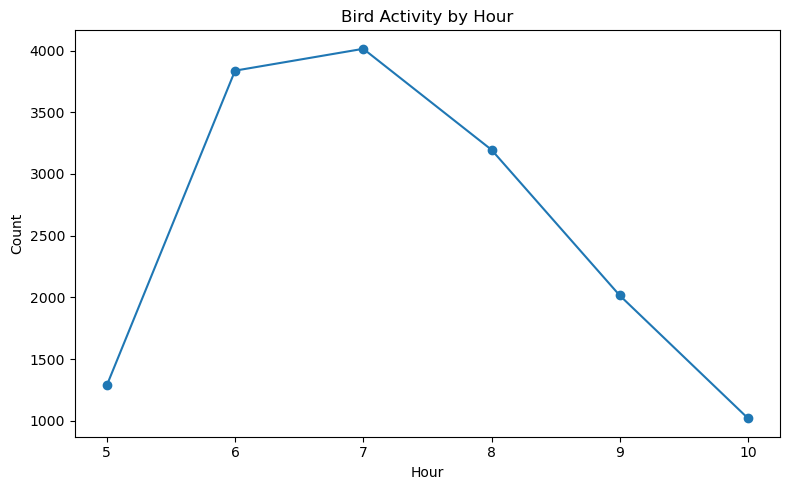

In [523]:
# Parse to datetime, specifying only HH:MM:SS
df['Start_Time_dt'] = pd.to_datetime(df['Start_Time'], format='%H:%M:%S', errors='coerce')

# Extract hour
df['Hour'] = df['Start_Time_dt'].dt.hour
df.groupby('Hour')['Scientific_Name'].count().plot(kind='line', marker='o', title='Bird Activity by Hour', figsize=(8, 5))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



**Observations made in First three Minutes**

Since Initial_Three_Min_Cnt is a boolean indicating whether the observation was made during the first three minutes (TRUE or FALSE), it can provide insights into detection probability and bird activity patterns during the initial survey period.

C:\Users\USER\AppData\Local\Temp\ipykernel_16988\39979917.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




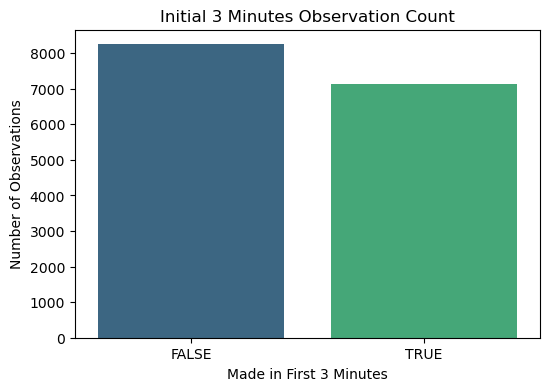

In [526]:
# Count observations
counts = df['Initial_Three_Min_Cnt'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette='viridis')
plt.xlabel('Made in First 3 Minutes')
plt.ylabel('Number of Observations')
plt.title('Initial 3 Minutes Observation Count')
plt.xticks([0, 1], ['FALSE', 'TRUE'])
plt.show()

<div style="background-color: purple; padding: 5px;">  

**Insights from Temporal Analysis**
- *The dataset only contains data for may, june and july months of 2018*
- *Maximum observation period is between 6:00 and 8:30 in the morning*
</div>

##### **Further Analysis is done on Power BI Dashboard. The insights from the both will be documented together on the insights pdf.**